In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Visualize

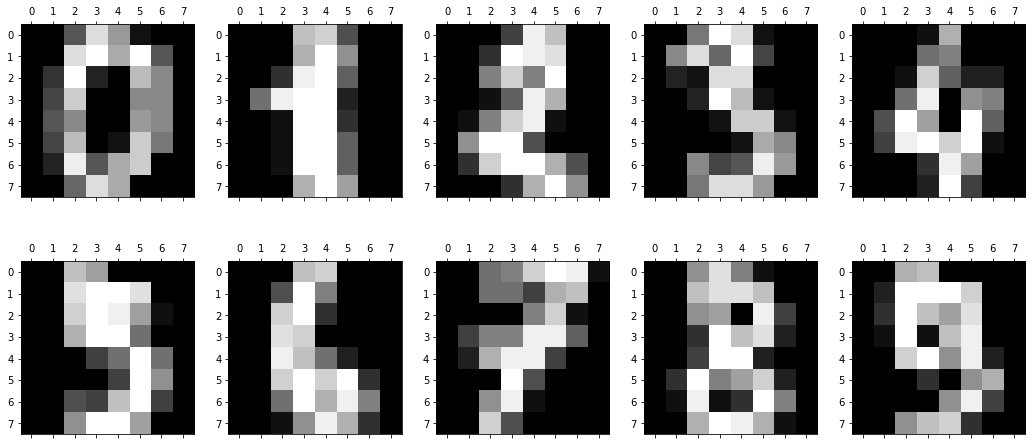

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [5]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
X_mean = X.mean()

X = X - X_mean

X.mean(), X.min(), X.max()

(8.995463126623417e-17, -4.8841645798553142, 11.115835420144686)

In [7]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.


(1797,) (1797, 10)


## Define Activation

### Sigmoid

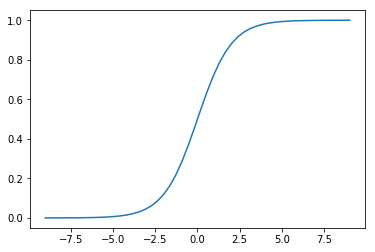

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

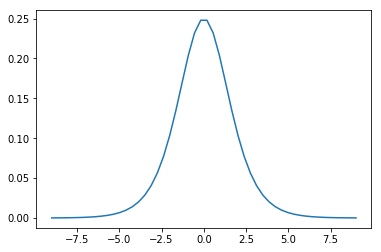

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Build a Model

In [10]:
from time import time

def train(X, y, num_epoch, learning_rate, update_method):
    errors = []

    start = time()

    w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                           high=+np.sqrt(6 / (64+100)),
                           size=(64, 100))

    w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                           high=+np.sqrt(6 / (100+10)),
                           size=(100, 10))

    for epoch in range(num_epoch):
        # Forward Propagation
        z1 = X.dot(w1)
        a1 = sigmoid(z1)
        z2 = a1.dot(w2)
        a2 = sigmoid(z2)

        y_predict = np.argmax(a2, axis=1)
        error = (y_predict != y).mean()

        if epoch % (num_epoch // 10) == 0:
            print("{0:3} error = {1:.5f}".format(epoch, error))

        errors.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'error': error,
        })

        # Backpropagation
        d2 = (a2 - y_hot)
        d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

        # Weight gradients
        dw2 = a1.T.dot(d2)
        dw1 = X.T.dot(d1)

        w1, w2 = update_method(epoch, learning_rate, w1, w2, dw1, dw2)

    print("----" * 10)
    print("{0:3} error = {1:.5f}".format(epoch, error))
    
    errors = pd.DataFrame(errors)
    errors = errors[["epoch", "elapsed", "error"]]

    return errors

### Stochastic Gradient Descent

In [11]:
def update_sgd(epoch, learning_rate, w1, w2, dw1, dw2):
    w2 = w2 - learning_rate * dw2
    w1 = w1 - learning_rate * dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

errors_sgd = train(X, y, num_epoch, learning_rate, update_method=update_sgd)

errors_sgd.head(10)

  0 error = 0.90651
 10 error = 0.16138
 20 error = 0.08459
 30 error = 0.06511
 40 error = 0.05676
 50 error = 0.04841
 60 error = 0.04452
 70 error = 0.03728
 80 error = 0.03395
 90 error = 0.03061
----------------------------------------
 99 error = 0.02949


,epoch,elapsed,error
0,0,0.023709,0.906511
1,1,0.063718,0.879243
2,2,0.096233,0.782415
3,3,0.113170,0.584307
4,4,0.147022,0.428492
5,5,0.178291,0.339455
6,6,0.222030,0.287702
7,7,0.257684,0.241514
8,8,0.290395,0.208681
9,9,0.317478,0.178075


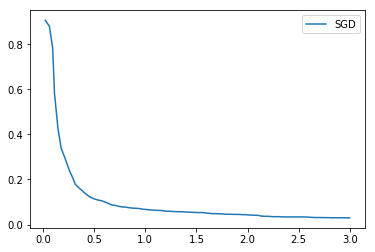

In [12]:
plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")

plt.legend()

### Momentum

In [15]:
mu = 0.9
cache_dw1, cache_dw2 = 0, 0

def update_momentum(epoch, learning_rate, w1, w2, dw1, dw2):
    # global 로 하면 안됨. class 로 변경 추후에
    global cache_dw1, cache_dw2
    
    cache_dw2 = mu * cache_dw2 - learning_rate * dw2
    w2 = w2 + cache_dw2
    
    cache_dw1 = mu * cache_dw1 - learning_rate * dw1
    w1 = w1 + cache_dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

errors_momentum = train(X, y, num_epoch, learning_rate, update_method=update_momentum)

errors_momentum.head(10)


  0 error = 0.90262
 10 error = 0.23205
 20 error = 0.07902
 30 error = 0.03895
 40 error = 0.02449
 50 error = 0.01391
 60 error = 0.00946
 70 error = 0.00668
 80 error = 0.00612
 90 error = 0.00501
----------------------------------------
 99 error = 0.00390


,epoch,elapsed,error
0,0,0.009186,0.902615
1,1,0.052054,0.864218
2,2,0.086257,0.813578
3,3,0.122877,0.740679
4,4,0.153928,0.703951
5,5,0.180852,0.646077
6,6,0.224812,0.513077
7,7,0.254501,0.376183
8,8,0.290305,0.235392
9,9,0.330293,0.219811


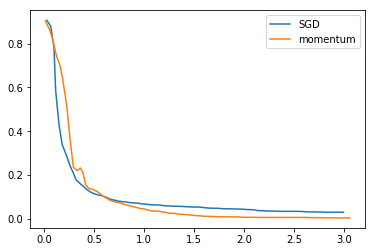

In [18]:
plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="momentum")

plt.legend()

### Nesterov Momentum

In [19]:
mu = 0.9
cache_dw1, cache_dw2 = 0, 0

def update_nesterov(epoch, learning_rate, w1, w2, dw1, dw2):
    # global 로 하면 안됨. class 로 변경 추후에
    global cache_dw1, cache_dw2
    
    dw2_prev = cache_dw2
    cache_dw2 = mu * cache_dw2 - learning_rate * dw2
    w2 = w2 + (-mu * dw2_prev) + (1 + mu) * cache_dw2
    
    dw1_prev = cache_dw1
    cache_dw1 = mu * cache_dw1 - learning_rate * dw1
    w1 = w1 + (-mu * dw1_prev) + (1 + mu) * cache_dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

errors_nesterov = train(X, y, num_epoch, learning_rate, update_method=update_nesterov)

errors_nesterov.head(10)


  0 error = 0.88592
 10 error = 0.15693
 20 error = 0.05008
 30 error = 0.02949
 40 error = 0.01781
 50 error = 0.01002
 60 error = 0.00668
 70 error = 0.00556
 80 error = 0.00390
 90 error = 0.00334
----------------------------------------
 99 error = 0.00278


,epoch,elapsed,error
0,0,0.011641,0.885921
1,1,0.043377,0.821369
2,2,0.077945,0.800223
3,3,0.109716,0.669449
4,4,0.130714,0.556483
5,5,0.161971,0.527546
6,6,0.194358,0.351141
7,7,0.241214,0.383973
8,8,0.275821,0.300501
9,9,0.294028,0.176405


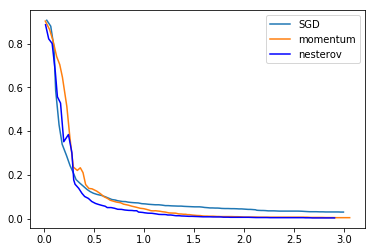

In [23]:
plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="momentum")
plt.plot(errors_nesterov['elapsed'],
         errors_nesterov['error'],
         label="nesterov", c='blue')

plt.legend()

### AdaGrad

In [29]:
eps = 0.0000000001
cache_dw1, cache_dw2 = 0, 0

def update_adagrad(epoch, learning_rate, w1, w2, dw1, dw2):
    # global 로 하면 안됨. class 로 변경 추후에
    global cache_dw1, cache_dw2
    
    cache_dw2 = cache_dw2 + dw2 ** 2
    w2 = w2 - learning_rate * dw2 / (np.sqrt(cache_dw2) + eps)
    
    cache_dw1 = cache_dw1 + dw1 ** 2
    w1 = w1 - learning_rate * dw1 / (np.sqrt(cache_dw1) + eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.01

errors_adagrad = train(X, y, num_epoch, learning_rate, update_method=update_adagrad)

errors_adagrad.head(10)
# write your code here!

  0 error = 0.88703
 10 error = 0.23873
 20 error = 0.12465
 30 error = 0.08514
 40 error = 0.06400
 50 error = 0.05565
 60 error = 0.05064
 70 error = 0.04674
 80 error = 0.04285
 90 error = 0.04062
----------------------------------------
 99 error = 0.03784


,epoch,elapsed,error
0,0,0.008342,0.887034
1,1,0.041280,0.860879
2,2,0.083099,0.761825
3,3,0.101051,0.649416
4,4,0.113150,0.526433
5,5,0.148673,0.416249
6,6,0.191293,0.356706
7,7,0.222309,0.317195
8,8,0.242454,0.279911
9,9,0.265352,0.258208


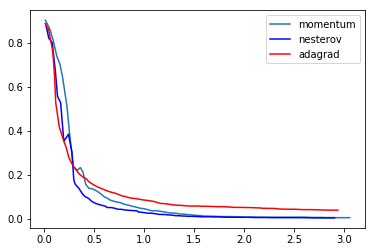

In [33]:
plt.plot(errors_momentum['elapsed'], errors_momentum['error'],label="momentum")
plt.plot(errors_nesterov['elapsed'], errors_nesterov['error'],label="nesterov", c='blue')
plt.plot(errors_adagrad['elapsed'], errors_adagrad['error'],label="adagrad", c='red')
plt.legend()

### RMSProp

In [48]:
eps = 0.0000000001
decay = 0.995

cache_dw1, cache_dw2 = 0, 0

def update_rmsprop(epoch, learning_rate, w1, w2, dw1, dw2):
    # global 로 하면 안됨. class 로 변경 추후에
    global cache_dw1, cache_dw2
    
    cache_dw2 = decay * cache_dw2 + (1 - decay) * dw2 ** 2
    w2 = w2 - learning_rate * dw2 / (np.sqrt(cache_dw2) + eps)
    
    cache_dw1 = decay * cache_dw1 + (1 - decay) * dw1 ** 2
    w1 = w1 - learning_rate * dw1 / (np.sqrt(cache_dw1) + eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.003

errors_rmsprop = train(X, y, num_epoch, learning_rate, update_method=update_rmsprop)

errors_rmsprop.head(10)
# write your code here!

  0 error = 0.92209
 10 error = 0.10462
 20 error = 0.05231
 30 error = 0.03506
 40 error = 0.02504
 50 error = 0.02226
 60 error = 0.01836
 70 error = 0.01558
 80 error = 0.01224
 90 error = 0.01113
----------------------------------------
 99 error = 0.00946


,epoch,elapsed,error
0,0,0.023461,0.922092
1,1,0.102221,0.821925
2,2,0.182796,0.702838
3,3,0.213436,0.308848
4,4,0.241143,0.257652
5,5,0.265839,0.173066
6,6,0.291642,0.216472
7,7,0.315974,0.144686
8,8,0.354500,0.155259
9,9,0.384225,0.122426


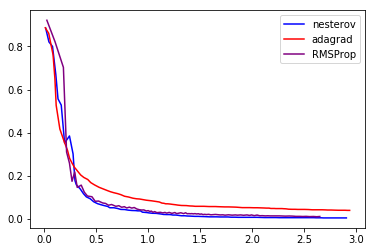

In [52]:
plt.plot(errors_nesterov['elapsed'], errors_nesterov['error'],label="nesterov", c='blue')
plt.plot(errors_adagrad['elapsed'], errors_adagrad['error'],label="adagrad", c='red')
plt.plot(errors_rmsprop['elapsed'], errors_rmsprop['error'],label="RMSProp", c='purple')
plt.legend()

### Adam

In [60]:
beta1 = 0.9
beta2 = 0.99
eps = 0.0000000001

dw1m, dw2m = 0,0
dw1v, dw2v = 0,0

cache_dw1, cache_dw2 = 0, 0

def update_adam(epoch, learning_rate, w1, w2, dw1, dw2):
    # global 로 하면 안됨. class 로 변경 추후에
    global dw1m, dw2m
    global dw1v, dw2v
    
    dw2m = beta1 * dw2m + (1 - beta1) * dw2
    dw2v = beta2 * dw2v + (1 - beta2) * (dw2 ** 2)   
    dw2mb = dw2m / (1 - beta1 ** (1 + epoch))
    dw2vb = dw2v / (1 - beta2 ** (1 + epoch))
    
    w2 = w2 - learning_rate * dw2mb / (np.sqrt(dw2vb) + eps)
    
    dw1m = beta1 * dw1m + (1 - beta1) * dw1
    dw1v = beta2 * dw1v + (1 - beta2) * (dw1 ** 2)
    dw1mb = dw1m / (1 - beta1 ** (1 + epoch))
    dw1vb = dw1v / (1 - beta2 ** (1 + epoch))
    
    w1 = w1 - learning_rate * dw1mb / (np.sqrt(dw1vb) + eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.01

errors_adam = train(X, y, num_epoch, learning_rate, update_method=update_adam)

errors_adam.head(10)
# write your code here!

  0 error = 0.89649
 10 error = 0.21146
 20 error = 0.09850
 30 error = 0.05676
 40 error = 0.03840
 50 error = 0.02671
 60 error = 0.01725
 70 error = 0.01224
 80 error = 0.01057
 90 error = 0.00835
----------------------------------------
 99 error = 0.00723


,epoch,elapsed,error
0,0,0.029599,0.896494
1,1,0.067217,0.832499
2,2,0.108015,0.662771
3,3,0.145696,0.510295
4,4,0.170783,0.461881
5,5,0.214612,0.459098
6,6,0.257700,0.412354
7,7,0.307792,0.335003
8,8,0.346241,0.273233
9,9,0.381050,0.231497


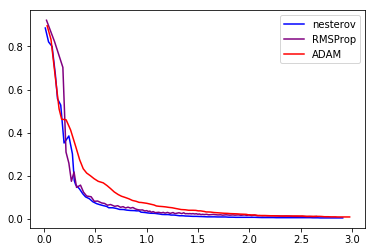

In [61]:
plt.plot(errors_nesterov['elapsed'], errors_nesterov['error'],label="nesterov", c='blue')
plt.plot(errors_rmsprop['elapsed'], errors_rmsprop['error'],label="RMSProp", c='purple')
plt.plot(errors_adam['elapsed'], errors_adam['error'],label="ADAM", c='red')
plt.legend()